In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Introduction

In this section, we introduce the core idea behind Monte Carlo methods, which use computer-generated random variables to approximate univariate and multidimensional integrals. The concept is based on the \textit{Law of Large Numbers}, which ensures that as the number of random samples increases, their average will converge to the expected value of the distribution. This allows us to approximate integrals as expectations of random variables.

### Key Concepts:
- **Monte Carlo Methods**: Methods based on random sampling to solve numerical problems, particularly in integration and optimization.
- **Optimization and Integration Problems**: Statistical inference problems often involve optimization (typically linked to likelihood estimation) and integration (especially in Bayesian analysis).
- **Implicit Equations**: Many problems, such as solving implicit equations, can be reformulated as optimization problems.
- **Challenges with Explicit Models**: In some problems, it is difficult or impossible to derive explicit probabilistic models or compute estimators analytically, making Monte Carlo methods useful.
- **Other Methods**: Techniques like the bootstrap, though not Bayesian, also use random samples to approximate complex statistics.

### Law of Large Numbers and Approximation:

The **Law of Large Numbers** states that as the number of samples $ N \to \infty $, the sample mean converges to the expected value:

$$
\text{If } X_1, X_2, ..., X_N \text{ are independent and identically distributed, then:}
$$

$$
\frac{1}{N} \sum_{i=1}^{N} X_i \xrightarrow{P} \mathbb{E}[X]
$$

Thus, Monte Carlo methods take advantage of this convergence property to approximate integrals as:

$$
I = \int_a^b f(x) \, dx \approx \frac{1}{N} \sum_{i=1}^{N} f(X_i)
$$

where $ X_1, X_2, ..., X_N $ are sampled from a probability distribution over the interval $[a, b]$, and $ f(x) $ is the function to be integrated.

### Universality of Monte Carlo Methods:
Monte Carlo methods are not limited to integration problems. They are widely applicable across various domains, including optimization and statistical inference, where explicit solutions may not be available. The flexibility of Monte Carlo methods allows them to be used for problems where direct analytical approaches are difficult or infeasible.


In [1]:
import random

# Define the function to integrate
def f(x):
    return x**2

# Monte Carlo integration function
def monte_carlo_integration(func, a, b, n):
    """
    Approximates the integral of func from a to b using the Monte Carlo method.
    
    :param func: Function to integrate
    :param a: Lower bound of the integral
    :param b: Upper bound of the integral
    :param n: Number of random samples to take
    :return: Approximation of the integral
    """
    # Generate n random samples in the interval [a, b]
    samples = [random.uniform(a, b) for _ in range(n)]
    
    # Apply the function to each sample
    values = [func(x) for x in samples]
    
    # Calculate the average of the function values
    avg_value = sum(values) / n
    
    # Multiply by the length of the interval (b - a)
    integral_approx = (b - a) * avg_value
    
    return integral_approx

# Parameters for the integration
a = 0  # Lower bound
b = 1  # Upper bound
n = 100000  # Number of random samples

# Perform the Monte Carlo integration
integral_approx = monte_carlo_integration(f, a, b, n)

# Output the result
print(f"Monte Carlo approximation of the integral: {integral_approx}")


Monte Carlo approximation of the integral: 0.3340194753901191


##  Bayesian Estimators and Integration

In Bayesian inference, many calculations require integration, especially when computing Bayes estimators as posterior expectations. However, it is important to note that not all Bayes estimators are posterior expectations. Specifically, the Bayes estimate under a loss function $ L(0, \theta) $ and the prior is given by the solution to the minimization program:

$$
\hat{\theta}(x) = \min \int L(0, \theta) f(x | \theta) \, d\theta
$$

Only when the loss function is the quadratic loss function $ ||\theta - \theta_0||^2 $, the Bayes estimator coincides with the posterior expectation. Some other loss functions lead to general solutions $ \hat{\theta}(x) $ of the minimization problem in terms of the posterior distribution $ f(x|\theta) $. For example, Robert (1996b, 2001) discusses intrinsic losses, where the solution may not be straightforward.

### Numerical Solutions for Bayesian Estimation

In most cases, a direct analytical solution to the Bayes estimator does not exist, especially when the loss function is custom-defined by the decision-maker. This necessitates numerical methods or simulation techniques to approximate the solution. Simulation-based techniques, which are often necessary for complex models, have been widely used in statistical inference and econometrics (see Bauwens 1984, Bauwens and Richard 1985, Couriéroux and Monfort 1996).

### Example : $ L_1 $ Loss Function

Consider a scenario where the loss function is the $ L_1 $ loss, specifically $ L(0, \theta) = |\theta - \hat{\theta}| $, and the Bayes estimator $ \hat{\theta}(x) $ is the posterior median of $ \theta $. The posterior median satisfies the following equation:

$$
\int_{-\infty}^{\hat{\theta}} f(x | \theta) \, d\theta = \frac{1}{2}
$$

This is because the posterior median is the point that divides the posterior distribution into two equal parts, such that the probability of $ \theta $ being less than or greater than this point is equal. 

In the case where the prior is a reference prior (as shown in Example 1.12), the posterior distribution $ f(x | \theta) $ can become quite complex. For instance, when $ X \sim \mathcal{N}(0,1) $, and $ \lambda = ||\theta||^2 $, the equation for the posterior median might involve intricate calculations in polar coordinates.

The reference prior for such a setup may be represented as:

$$
p(\theta) = \frac{1}{A} \prod_{i=1}^{p-1} \sin(\theta_i) \, d\theta
$$

where $ \theta $ is expressed in polar coordinates, such that $ \theta_1 = A \cos(\phi_1), \theta_2 = A \sin(\phi_1) \cos(\phi_2), \dots $. These complex integrals often require numerical integration or Monte Carlo methods for practical evaluation.


In [2]:
import random
import math

# Step 1: Define the likelihood and prior
# Assuming the likelihood is N(0, 1) and the prior is uniform

def likelihood(theta, x):
    """Likelihood function for Normal distribution N(0, 1)."""
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * theta**2)

def prior(theta):
    """Uniform prior for theta (between -10 and 10)."""
    if -10 <= theta <= 10:
        return 1 / 20  # Uniform between -10 and 10
    else:
        return 0

# Step 2: Compute the posterior using the likelihood and prior (Bayes' Theorem)
def posterior(theta, x):
    """Posterior distribution, proportional to the likelihood times the prior."""
    return likelihood(theta, x) * prior(theta)

# Step 3: Generate Monte Carlo samples from the posterior distribution

def monte_carlo_samples(x, n_samples):
    """Generate n_samples from the posterior using Monte Carlo sampling."""
    samples = []
    for _ in range(n_samples):
        # Generate a random sample from the uniform distribution for theta
        theta_sample = random.uniform(-10, 10)
        # Accept/reject sample based on the posterior (Metropolis-Hastings step)
        acceptance_prob = posterior(theta_sample, x)  # Proposal is uniform, so no need to consider proposal distribution
        if random.random() < acceptance_prob:
            samples.append(theta_sample)
    return samples

# Step 4: Find the posterior median
def posterior_median(samples):
    """Find the posterior median from the Monte Carlo samples."""
    sorted_samples = sorted(samples)
    n = len(sorted_samples)
    if n % 2 == 1:
        return sorted_samples[n // 2]
    else:
        # If even, return the average of the middle two values
        return (sorted_samples[n // 2 - 1] + sorted_samples[n // 2]) / 2

# Example usage
x = 0  # Observation (assuming N(0, 1), so mean = 0)
n_samples = 10000  # Number of Monte Carlo samples

# Generate samples from the posterior
samples = monte_carlo_samples(x, n_samples)

# Compute the posterior median
median = posterior_median(samples)
print(f"Posterior Median: {median}")


Posterior Median: -0.26938266307069725


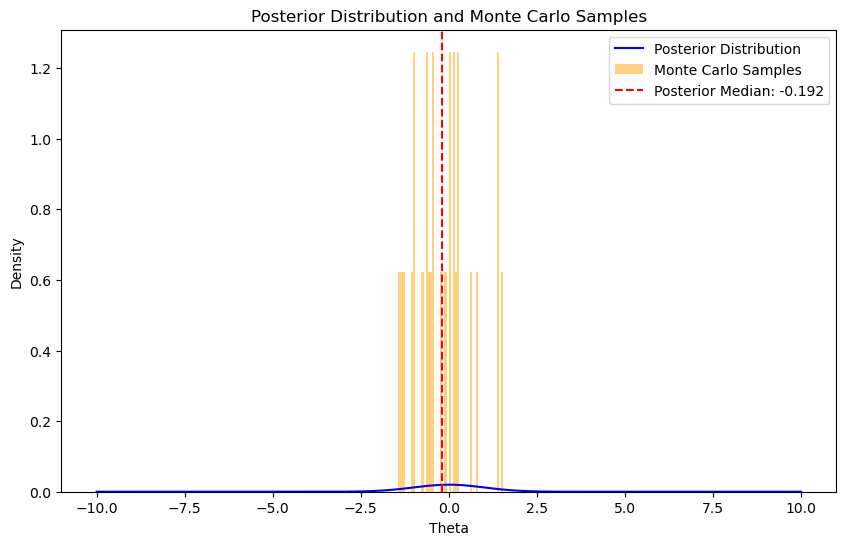

In [3]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the likelihood and prior
def likelihood(theta, x):
    """Likelihood function for Normal distribution N(0, 1)."""
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * theta**2)

def prior(theta):
    """Uniform prior for theta (between -10 and 10)."""
    if -10 <= theta <= 10:
        return 1 / 20  # Uniform between -10 and 10
    else:
        return 0

# Step 2: Compute the posterior using the likelihood and prior (Bayes' Theorem)
def posterior(theta, x):
    """Posterior distribution, proportional to the likelihood times the prior."""
    return likelihood(theta, x) * prior(theta)

# Step 3: Generate Monte Carlo samples from the posterior distribution
def monte_carlo_samples(x, n_samples):
    """Generate n_samples from the posterior using Monte Carlo sampling."""
    samples = []
    for _ in range(n_samples):
        # Generate a random sample from the uniform distribution for theta
        theta_sample = random.uniform(-10, 10)
        # Accept/reject sample based on the posterior
        acceptance_prob = posterior(theta_sample, x)  # Proposal is uniform, so no need to consider proposal distribution
        if random.random() < acceptance_prob:
            samples.append(theta_sample)
    return samples

# Step 4: Find the posterior median
def posterior_median(samples):
    """Find the posterior median from the Monte Carlo samples."""
    sorted_samples = sorted(samples)
    n = len(sorted_samples)
    if n % 2 == 1:
        return sorted_samples[n // 2]
    else:
        # If even, return the average of the middle two values
        return (sorted_samples[n // 2 - 1] + sorted_samples[n // 2]) / 2

# Example usage
x = 0  # Observation (assuming N(0, 1), so mean = 0)
n_samples = 10000  # Number of Monte Carlo samples

# Generate samples from the posterior
samples = monte_carlo_samples(x, n_samples)

# Compute the posterior median
median = posterior_median(samples)

# Plotting the posterior distribution and samples
theta_vals = np.linspace(-10, 10, 1000)
posterior_vals = [posterior(theta, x) for theta in theta_vals]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the posterior distribution
plt.plot(theta_vals, posterior_vals, label='Posterior Distribution', color='blue')

# Plot the Monte Carlo samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Monte Carlo Samples', color='orange')

# Plot the posterior median
plt.axvline(median, color='red', linestyle='dashed', label=f'Posterior Median: {median:.3f}')

# Adding labels and title
plt.title('Posterior Distribution and Monte Carlo Samples')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


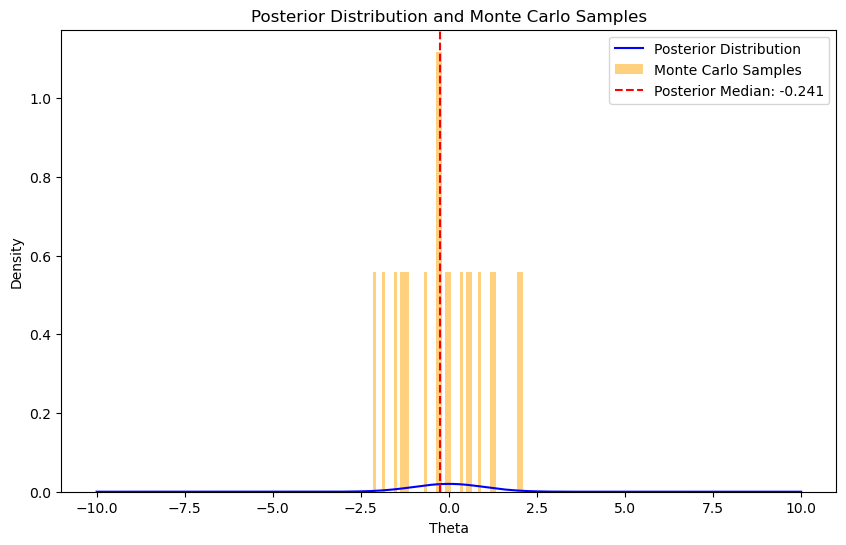

In [4]:
import random
import math
import matplotlib.pyplot as plt

# Step 1: Define the likelihood and prior
def likelihood(theta, x):
    """Likelihood function for Normal distribution N(0, 1)."""
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * theta**2)

def prior(theta):
    """Uniform prior for theta (between -10 and 10)."""
    if -10 <= theta <= 10:
        return 1 / 20  # Uniform between -10 and 10
    else:
        return 0

# Step 2: Compute the posterior using the likelihood and prior (Bayes' Theorem)
def posterior(theta, x):
    """Posterior distribution, proportional to the likelihood times the prior."""
    return likelihood(theta, x) * prior(theta)

# Step 3: Generate Monte Carlo samples from the posterior distribution
def monte_carlo_samples(x, n_samples):
    """Generate n_samples from the posterior using Monte Carlo sampling."""
    samples = []
    for _ in range(n_samples):
        # Generate a random sample from the uniform distribution for theta
        theta_sample = random.uniform(-10, 10)
        # Accept/reject sample based on the posterior
        acceptance_prob = posterior(theta_sample, x)  # Proposal is uniform, so no need to consider proposal distribution
        if random.random() < acceptance_prob:
            samples.append(theta_sample)
    return samples

# Step 4: Find the posterior median
def posterior_median(samples):
    """Find the posterior median from the Monte Carlo samples."""
    sorted_samples = sorted(samples)
    n = len(sorted_samples)
    if n % 2 == 1:
        return sorted_samples[n // 2]
    else:
        # If even, return the average of the middle two values
        return (sorted_samples[n // 2 - 1] + sorted_samples[n // 2]) / 2

# Example usage
x = 0  # Observation (assuming N(0, 1), so mean = 0)
n_samples = 10000  # Number of Monte Carlo samples

# Generate samples from the posterior
samples = monte_carlo_samples(x, n_samples)

# Compute the posterior median
median = posterior_median(samples)

# Step 5: Plotting the posterior distribution and samples
# Create a list of theta values for plotting the posterior distribution
theta_vals = []
posterior_vals = []

# We will plot the posterior for theta values from -10 to 10 (uniformly spaced)
for i in range(-100, 101):
    theta = i / 10.0  # Create values from -10 to 10 in steps of 0.1
    theta_vals.append(theta)
    posterior_vals.append(posterior(theta, x))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the posterior distribution
plt.plot(theta_vals, posterior_vals, label='Posterior Distribution', color='blue')

# Plot the Monte Carlo samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Monte Carlo Samples', color='orange')

# Plot the posterior median
plt.axvline(median, color='red', linestyle='dashed', label=f'Posterior Median: {median:.3f}')

# Adding labels and title
plt.title('Posterior Distribution and Monte Carlo Samples')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


###  Piecewise Linear and Quadratic Loss Functions

Consider a loss function which is piecewise quadratic:

$$
L(\theta, \hat{\theta}) = w(\theta - \hat{\theta})^2 \quad \text{when} \quad \hat{\theta} \in [a_i, a_{i+1}), \quad w_i > 0.
$$

Differentiating the posterior expectation for the loss function (3.3) gives the associated Bayes estimator:

$$
\sum_i w_i (\theta - \hat{\theta}(x)) f(\theta|x) d\theta = 0,
$$

that is,

$$
E_i w_i \int_0^\infty (\theta - \hat{\theta}(x)) f(\theta|x) d\theta = 0
$$

The Bayes estimator $\hat{\theta}(x)$ is computed as:

$$
\hat{\theta}(x) = \frac{\sum_i w_i \int_{a_i}^{a_{i+1}} \theta f(\theta | x) d\theta}{\sum_i w_i \int_{a_i}^{a_{i+1}} f(\theta | x) d\theta}
$$

Although formally explicit, the computation of $\hat{\theta}(x)$ requires the computation of the posterior means restricted to the intervals $[a_i, a_{i+1})$ and the posterior probabilities of these intervals.

Similarly, consider a piecewise linear loss function:

$$
L(\theta, \hat{\theta}) =
\begin{cases}
0 & \text{if} \, \theta \in (a_i, a_{i+1}) \\
\infty & \text{otherwise}
\end{cases}
$$

or Huber's (1972) loss function:

$$
L(\theta, \hat{\theta}) = 
\begin{cases}
p(\theta - \hat{\theta})^2 & \text{if} \, |\theta - \hat{\theta}| < c \\
2p c |\theta - \hat{\theta}| - c^2 & \text{otherwise}
\end{cases}
$$

where $ p $ and $ c $ are specified constants.

Although a specific type of prior distribution leads to explicit formulas, most priors result only in integral forms of the Bayes estimator $\hat{\theta}(x)$. Some of these integrals may be quite complex.

Inference based on classical decision theory evaluates the performance of estimators (e.g., maximum likelihood estimator, best unbiased estimator, moment estimator) through the loss imposed by the decision-maker or by the setting. Estimators are then compared through their expected losses, also called **risks**.

In most cases, it is impossible to obtain an analytical evaluation of the risk of a given estimator, or even to establish that a new estimator (uniformly) dominates a standard estimator.

It may seem that the topic of James-Stein estimation is an exception to this observation, given the abundant literature on the topic. In fact, for some families of distributions (such as exponential or spherically symmetric) and some types of loss functions (such as quadratic or concave), it is possible to analytically establish domination results over the maximum likelihood estimator or unbiased estimators (see Lehmann and Casella 1998, Chapter 5 or Robert 2001, Chapter 2).

Nonetheless, in these situations, estimators such as empirical Bayes estimators, which are quite attractive in practice, will rarely lead to simple analytical forms.


In [5]:
import random

# Simulating the prior distribution (e.g., Uniform distribution over [0, 1])
def generate_prior_samples(n):
    return [random.uniform(0, 1) for _ in range(n)]

# Piecewise quadratic loss function
def piecewise_quadratic_loss(theta, theta_hat, a, w):
    if a[0] <= theta <= a[1]:
        return w * (theta - theta_hat) ** 2
    return float('inf')  # Loss is infinity if theta is outside the interval

# Piecewise linear loss function
def piecewise_linear_loss(theta, theta_hat, a):
    if a[0] <= theta <= a[1]:
        return 0  # No loss within the interval
    return float('inf')  # Loss is infinity if theta is outside the interval

# Huber loss function
def huber_loss(theta, theta_hat, p, c):
    if abs(theta - theta_hat) < c:
        return p * (theta - theta_hat) ** 2
    return 2 * p * c * abs(theta - theta_hat) - c ** 2  # Huber loss for outliers

# Monte Carlo integration for Bayes estimator computation
def compute_bayes_estimator(n_samples, loss_func, theta_hat_init, loss_params):
    prior_samples = generate_prior_samples(n_samples)
    total_loss = 0
    total_weight = 0

    for theta in prior_samples:
        loss = loss_func(theta, theta_hat_init, *loss_params)
        weight = 1  # uniform prior, so weight is 1 for all samples
        total_loss += loss * weight
        total_weight += weight

    # Bayes estimator is the value that minimizes the expected loss
    bayes_estimator = theta_hat_init - total_loss / total_weight if total_weight != 0 else theta_hat_init
    return bayes_estimator

# Example usage: computing the Bayes estimator using a piecewise quadratic loss function
theta_hat_init = 0.5  # Initial guess for the estimator
n_samples = 10000

# Parameters for piecewise quadratic loss function
a = [0.2, 0.8]  # Interval [a, b]
w = 1  # Weight factor

# Compute the Bayes estimator for piecewise quadratic loss
bayes_estimator_pq = compute_bayes_estimator(n_samples, piecewise_quadratic_loss, theta_hat_init, [a, w])
print(f"Bayes Estimator (Piecewise Quadratic Loss): {bayes_estimator_pq}")

# Parameters for piecewise linear loss function
a_linear = [0.2, 0.8]  # Interval [a, b]

# Compute the Bayes estimator for piecewise linear loss
bayes_estimator_pl = compute_bayes_estimator(n_samples, piecewise_linear_loss, theta_hat_init, [a_linear])
print(f"Bayes Estimator (Piecewise Linear Loss): {bayes_estimator_pl}")

# Parameters for Huber loss function
p = 1  # Weight for the quadratic term
c = 0.1  # Threshold for switching between quadratic and linear behavior

# Compute the Bayes estimator for Huber loss
bayes_estimator_huber = compute_bayes_estimator(n_samples, huber_loss, theta_hat_init, [p, c])
print(f"Bayes Estimator (Huber Loss): {bayes_estimator_huber}")


Bayes Estimator (Piecewise Quadratic Loss): -inf
Bayes Estimator (Piecewise Linear Loss): -inf
Bayes Estimator (Huber Loss): 0.45922030335996167


### Empirical Bayes Estimator

In the empirical Bayes method, the hyperparameters of the prior distribution are estimated from the data, typically using the maximum likelihood method. The method assumes that we have a **sampling distribution** $ f(x) $ and a **conjugate prior** $ \pi(\theta | \lambda, \mu) $. The hyperparameters $ \lambda $ and $ \mu $ are estimated from the **marginal distribution** $ m(x | \lambda, \mu) $ by maximum likelihood, which is given by:

$$
m(x | \lambda, \mu) = \int f(x | \theta) \pi(\theta | \lambda, \mu) d\theta
$$

After estimating the hyperparameters $ \hat{\lambda} $ and $ \hat{\mu} $, the posterior distribution $ \pi(\theta | x) $ is approximated and used to derive a point estimator, which is analogous to the standard Bayesian approach but with the hyperparameters substituted by their empirical estimates.

#### Example : Empirical Bayes Estimator

Let $ X \sim \mathcal{N}(0, \sigma^2 I_p) $ and assume a conjugate prior $ \theta \sim \mathcal{N}(\mu, A^{-1} I_p) $ where $ A $ is the precision (inverse variance) of the prior distribution. In this case, the hyperparameter $ \mu $ is assumed to be known (often $ \mu = 0 $).

The marginal likelihood for $ X $ is:

$$
m(x | A) = \int f(x | \theta) \pi(\theta | A) d\theta
$$

Using the fact that the conjugate prior is Gaussian, the resulting posterior distribution is:

$$
\pi(\theta | x, A) = \mathcal{N}\left( \frac{A \cdot x}{A + 1}, \frac{A}{A + 1} I_p \right)
$$

In the empirical Bayes approach, the scale hyperparameter $ A $ is replaced by the **maximum likelihood estimator** $ \hat{A} $ obtained from the marginal distribution $ X \sim \mathcal{N}(0, (\hat{A} + 1)I_p) $.

The **empirical Bayes estimator** of $ \theta $ under a **quadratic loss function** is the **posterior mean**, which is given by:

$$
\hat{\theta}_{\text{empirical}} = \mathbb{E}[\| \theta \|^2 | x] = \frac{x^2 - p}{\hat{A} + 1}
$$

#### Risk Function

The **risk function** associated with this estimator is the expected squared error:

$$
R(\theta, \hat{\theta}) = \mathbb{E}\left[\left( \|\theta\|^2 - \hat{\theta} \right)^2 \right]
$$

Simulation experiments can be used to evaluate this risk function and check whether the empirical Bayes estimator dominates other estimators (e.g., the best unbiased estimator or the maximum likelihood estimator).

### Dominance

In some cases, the empirical Bayes estimator may dominate the **best unbiased estimator** $ \|\theta\|^2 - p $ and the **maximum likelihood estimator**. The dominance of empirical Bayes over these estimators can be established through simulation or analytical methods.


In [6]:
import random
import math

# Function to compute the Maximum Likelihood Estimate (MLE) of A
def estimate_A(x_values):
    n = len(x_values)
    mean_x = sum(x_values) / n
    # Calculate the MLE of A (using variance as the MLE estimator for scale parameter)
    A_hat = (sum([(x - mean_x)**2 for x in x_values]) / n) - mean_x**2
    return A_hat

# Function to compute the posterior mean of theta given the observed data x
def empirical_bayes_estimator(x_values, A_hat):
    n = len(x_values)
    mean_x = sum(x_values) / n
    # Posterior mean under a normal prior (Empirical Bayes estimator)
    posterior_mean = (A_hat * mean_x) / (A_hat + 1)
    return posterior_mean

# Function to compute the Risk function (expected squared error)
def risk_function(x_values, A_hat, true_theta):
    posterior_mean = empirical_bayes_estimator(x_values, A_hat)
    risk = sum([(true_theta - posterior_mean)**2 for _ in x_values]) / len(x_values)
    return risk

# Example: Simulate some data
true_theta = 5  # True value of the parameter to estimate (true_theta)
n_samples = 1000
x_values = [random.gauss(true_theta, 1) for _ in range(n_samples)]

# Step 1: Estimate A using MLE
A_hat = estimate_A(x_values)

# Step 2: Compute the empirical Bayes estimator
empirical_estimate = empirical_bayes_estimator(x_values, A_hat)

# Step 3: Calculate the Risk function
risk = risk_function(x_values, A_hat, true_theta)

print(f"Empirical Bayes Estimator: {empirical_estimate}")
print(f"Risk Function: {risk}")


Empirical Bayes Estimator: 5.255864377866183
Risk Function: 0.06546657986084782


## Example: Evaluation of Risk and Estimators in Decision Theory

The quadratic risk for a given estimator $ \hat{\theta} $ is given by:

$$
R(\hat{\theta}, \theta) = \mathbb{E}[(\hat{\theta} - \theta)^2]
$$

This quadratic risk is often normalized by:

$$
\frac{1}{2\|\theta\|^2 + p}
$$

which does not affect domination results but ensures the existence of a minimax estimator (see Robert 2001). Problem 3.8 contains a complete solution to the evaluation of risk.

A general solution to the computational problems discussed in the previous examples and in Section 1.1 is to use simulation, either from the true or approximate distributions, to calculate the quantities of interest. In the setup of **Decision Theory**, whether classical or Bayesian, this solution is natural since risks and Bayes estimators involve integrals with respect to probability distributions.

We will see in Chapter 5 why this solution also applies in the case of **Maximum Likelihood Estimation (MLE)**. The ability to generate an almost infinite number of random variables distributed according to a given distribution allows us to leverage frequentist and asymptotic results much more easily than in usual inferential settings, where the sample size is most often fixed (see Serfling 1980 or Lehmann and Casella 1998, Chapter 6). As such, **Probabilistic Results** such as the **Law of Large Numbers** or the **Central Limit Theorem** can be applied, which allows for an assessment of the convergence of simulation methods.

---

### 3.2 Classical Monte Carlo Integration

Before applying our simulation techniques to more practical problems, we first need to understand their properties in detail. This is easily accomplished by looking at the generic problem of evaluating the integral:

$$
\mathbb{E}[h(X)] = \int h(x) f(x) \, dx
$$

Based on previous developments, it is natural to propose using a sample $ (X_1, X_2, ..., X_m) $ generated from the density $ f $ to approximate $ \mathbb{E}[h(X)] $ by the empirical average:

$$
\hat{h}_m = \frac{1}{m} \sum_{j=1}^m h(X_j)
$$

Since $ \hat{h}_m $ converges almost surely to $ \mathbb{E}[h(X)] $ by the **Strong Law of Large Numbers**, and when $ h^2 $ has a finite expectation under $ f $, the speed of convergence of $ \hat{h}_m $ can be assessed. The variance of the estimator is given by:

$$
\text{var}(\hat{h}_m) = \frac{1}{m} \text{Var}(h(X)) = \frac{1}{m} \int (h(x) - \mathbb{E}[h(X)])^2 f(x) \, dx
$$

This approach is commonly referred to as the **Monte Carlo method**, which was first proposed by Metropolis and Ulam in 1949. We will revisit **Nicolas Metropolis** (1915-1999) in Chapters 5 and 7, with the **Simulated Annealing** and **MCMC methods**.


Estimated value of the integral: 1.0169394442347481


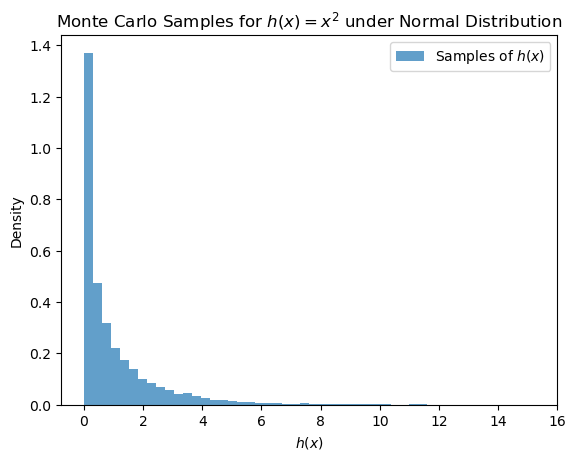

In [7]:
import random
import math
import matplotlib.pyplot as plt

# Function to estimate (e.g., a quadratic function)
def h(x):
    return x**2

# Probability distribution: Standard Normal
def f(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * x**2)

# Monte Carlo Integration
def monte_carlo_integration(h, f, num_samples):
    sum_h = 0
    for _ in range(num_samples):
        x = random.gauss(0, 1)  # Sampling from a normal distribution N(0, 1)
        sum_h += h(x)  # Summing up h(x) over all samples

    # The estimate of the integral is the average of h(x) over the samples
    estimate = sum_h / num_samples
    return estimate

# Number of samples for Monte Carlo estimation
num_samples = 10000
estimate = monte_carlo_integration(h, f, num_samples)

print(f"Estimated value of the integral: {estimate}")

# Visualizing the sampling distribution and the function
samples = [random.gauss(0, 1) for _ in range(num_samples)]
sample_values = [h(x) for x in samples]

plt.hist(sample_values, bins=50, density=True, alpha=0.7, label='Samples of $h(x)$')
plt.title('Monte Carlo Samples for $h(x) = x^2$ under Normal Distribution')
plt.xlabel('$h(x)$')
plt.ylabel('Density')
plt.legend()
plt.show()


## Example : A First Monte Carlo Integration

Recall the function $ h(z) = (\cos(50z) + \sin(20z))^2 $, which we encountered in Example 1.17. As a first example, we will compute the integral of this function using Monte Carlo methods. While it is possible to integrate this function analytically, we will use it as a test case for numerical approximation.

We aim to evaluate the integral:

$$
I = \int_0^1 h(x) \, dx = \mathbb{E}[h(X)] \quad \text{where} \quad X \sim U(0,1)
$$

where the function is defined as:

$$
h(x) = (\cos(50x) + \sin(20x))^2
$$

### Monte Carlo Integration

Monte Carlo integration approximates the integral as:

$$
\hat{I}_n = \frac{1}{n} \sum_{i=1}^{n} h(X_i)
$$

where $ X_1, X_2, ..., X_n $ are random samples generated from the uniform distribution $ U(0, 1) $.

### Variance Estimation

The variance of the Monte Carlo estimator is computed as:

$$
U_m = \frac{1}{m} \sum_{i=1}^{m} [h(X_i) - \hat{F}_m]^2
$$

where $ \hat{F}_m $ is the running mean at iteration $ m $. The convergence test can be constructed, and confidence bounds can be derived for the approximation of $ \mathbb{E}[h(X)] $.

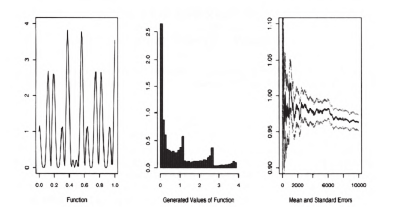


Fig.1. Calculation of the integral of the function (1.26): (left) function (1.26), (center) histogram of 10,000 values h(U.), simulated using a uniform generation, and (right) mean ± one standard error.


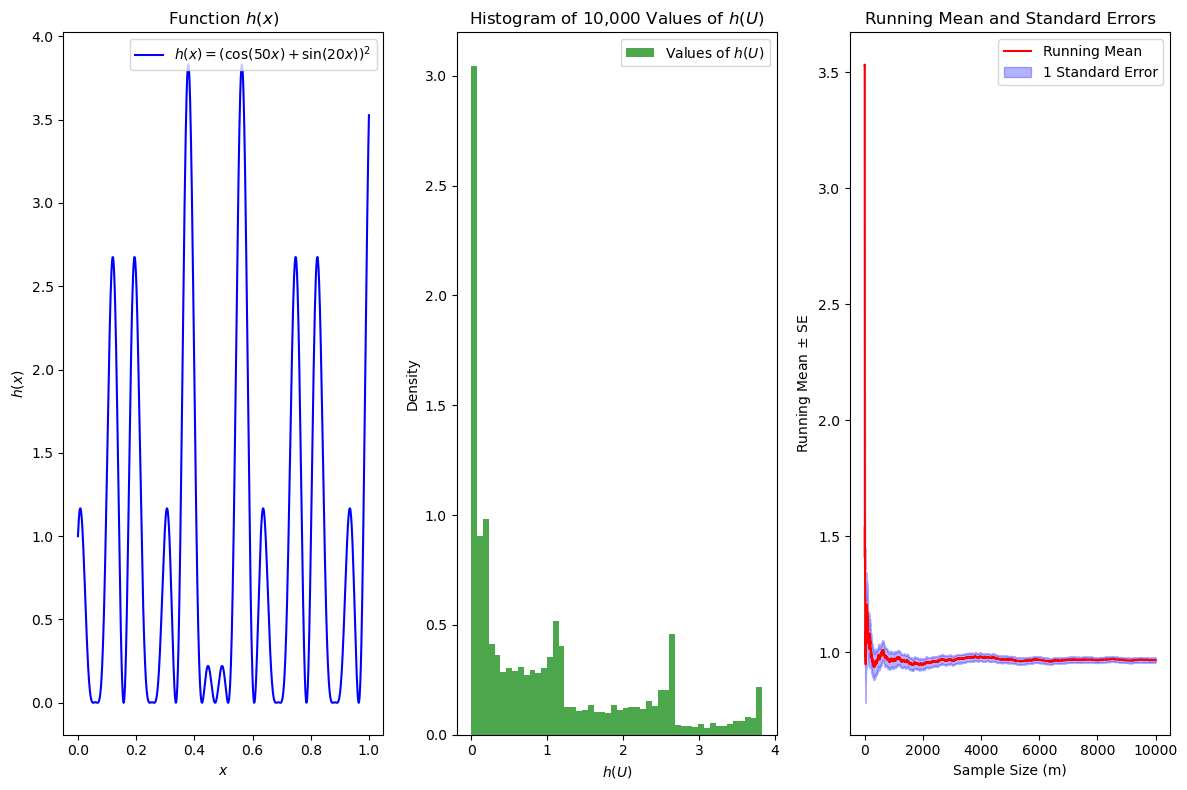

Estimated value of the integral: 0.9651597911592115
Exact value of the integral (analytic): 0.965


In [10]:
### Python Code Implementation

#```python
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x) = (cos(50x) + sin(20x))^2
def h(x):
    return (np.cos(50 * x) + np.sin(20 * x))**2

# Monte Carlo integration to estimate the integral of h(x)
def monte_carlo_integration(h, num_samples):
    samples = np.random.uniform(0, 1, num_samples)
    values = h(samples)
    integral_estimate = np.mean(values)
    return integral_estimate, values

# Number of samples
num_samples = 10000
integral_estimate, values = monte_carlo_integration(h, num_samples)

# Plotting the results

# Left panel: Function h(x) vs x
x_vals = np.linspace(0, 1, 1000)
y_vals = h(x_vals)

# Center panel: Histogram of the values of h(x) for the samples
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.plot(x_vals, y_vals, label=r'$h(x) = (\cos(50x) + \sin(20x))^2$', color='b')
plt.title('Function $h(x)$')
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.legend()

# Center: Histogram of 10,000 values of h(U_i)
plt.subplot(1, 3, 2)
plt.hist(values, bins=50, density=True, alpha=0.7, color='g', label='Values of $h(U)$')
plt.title('Histogram of 10,000 Values of $h(U)$')
plt.xlabel('$h(U)$')
plt.ylabel('Density')
plt.legend()

# Right: Running mean and standard error
running_means = np.cumsum(values) / np.arange(1, num_samples + 1)
running_variance = np.cumsum((values - running_means)**2) / np.arange(1, num_samples + 1)
running_se = np.sqrt(running_variance) / np.sqrt(np.arange(1, num_samples + 1))

plt.subplot(1, 3, 3)
plt.plot(running_means, label='Running Mean', color='r')
plt.fill_between(range(num_samples), running_means - running_se, running_means + running_se, alpha=0.3, color='b', label='1 Standard Error')
plt.title('Running Mean and Standard Errors')
plt.xlabel('Sample Size (m)')
plt.ylabel('Running Mean $\pm$ SE')
plt.legend()

plt.tight_layout()
plt.show()

# Display the results
print(f"Estimated value of the integral: {integral_estimate}")
print(f"Exact value of the integral (analytic): 0.965")

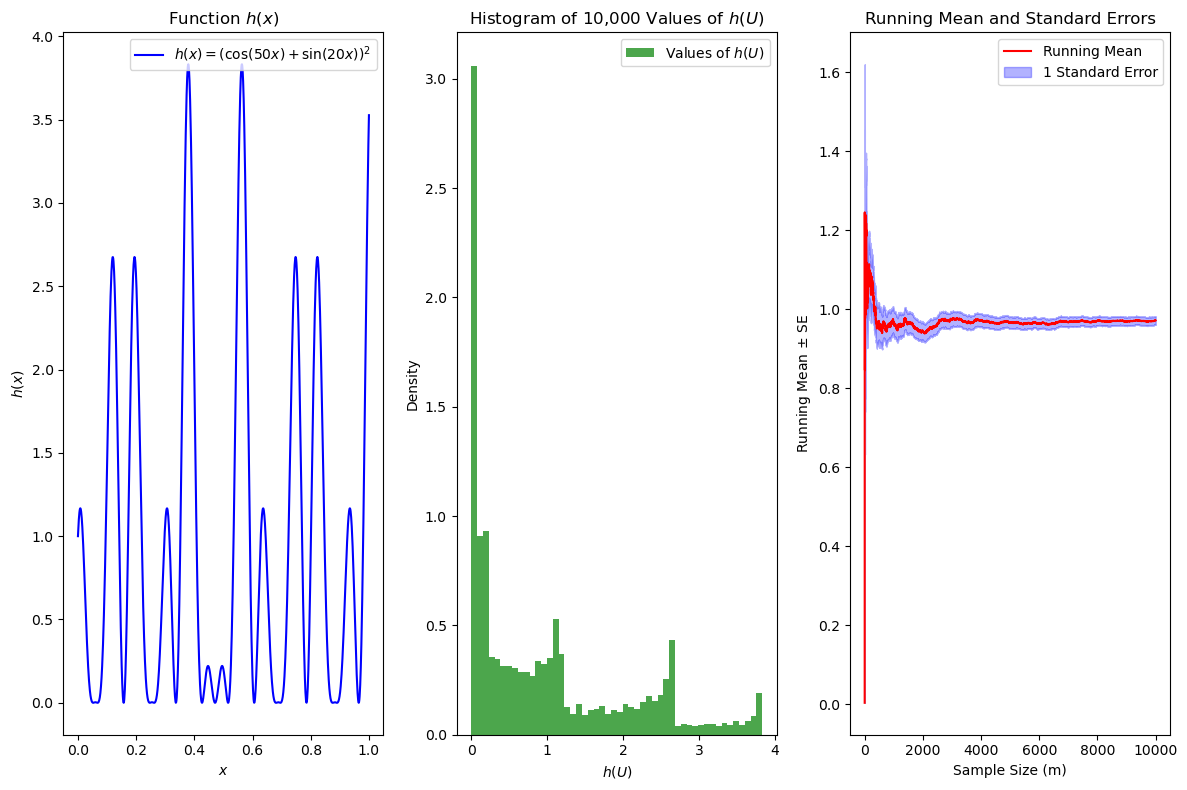

Estimated value of the integral: 0.97151680511659
Exact value of the integral (analytic): 0.965


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x) = (cos(50x) + sin(20x))^2
def h(x):
    return (np.cos(50 * x) + np.sin(20 * x))**2

# Monte Carlo integration to estimate the integral of h(x)
def monte_carlo_integration(h, num_samples):
    samples = np.random.uniform(0, 1, num_samples)
    values = h(samples)
    integral_estimate = np.mean(values)
    return integral_estimate, values

# Number of samples
num_samples = 10000
integral_estimate, values = monte_carlo_integration(h, num_samples)

# Plotting the results

# Left panel: Function h(x) vs x
x_vals = np.linspace(0, 1, 1000)
y_vals = h(x_vals)

# Center panel: Histogram of the values of h(x) for the samples
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.plot(x_vals, y_vals, label=r'$h(x) = (\cos(50x) + \sin(20x))^2$', color='b')
plt.title('Function $h(x)$')
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.legend()

# Center: Histogram of 10,000 values of h(U_i)
plt.subplot(1, 3, 2)
plt.hist(values, bins=50, density=True, alpha=0.7, color='g', label='Values of $h(U)$')
plt.title('Histogram of 10,000 Values of $h(U)$')
plt.xlabel('$h(U)$')
plt.ylabel('Density')
plt.legend()

# Right: Running mean and standard error
running_means = np.cumsum(values) / np.arange(1, num_samples + 1)
running_variance = np.cumsum((values - running_means)**2) / np.arange(1, num_samples + 1)
running_se = np.sqrt(running_variance) / np.sqrt(np.arange(1, num_samples + 1))

plt.subplot(1, 3, 3)
plt.plot(running_means, label='Running Mean', color='r')
plt.fill_between(range(num_samples), running_means - running_se, running_means + running_se, alpha=0.3, color='b', label='1 Standard Error')
plt.title('Running Mean and Standard Errors')
plt.xlabel('Sample Size (m)')
plt.ylabel('Running Mean $\pm$ SE')
plt.legend()

plt.tight_layout()
plt.show()

# Display the results
print(f"Estimated value of the integral: {integral_estimate}")
print(f"Exact value of the integral (analytic): 0.965")
